In [51]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange

In [85]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = torch.from_numpy(X).float()
y = np.array(y, dtype='int')
y = torch.from_numpy(y)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [140]:
class NicoNet(nn.Module):
    def __init__(self, in_shape, n_classes):
        super(NicoNet, self).__init__()
        self.fc1 = nn.Linear(in_shape, in_shape)
        self.fc2 = nn.Linear(in_shape, n_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
       # x = torch.sigmoid(x)
        return x
        

loss: 0.27, acc: 1e+00: 100%|██████████| 500/500 [00:05<00:00, 93.70it/s] 


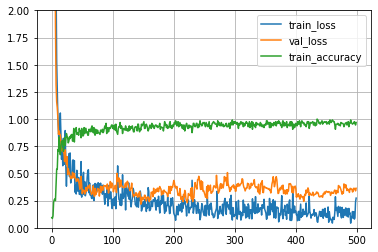

In [141]:
model = NicoNet(X_train.shape[1], 10)
optim = torch.optim.SGD(model.parameters(),lr = 0.005)
loss_function = torch.nn.CrossEntropyLoss()
loss_history = []
val_loss = []
accuracy_history = []
batch_size = 128
for epoch in (t := trange(500)):
    optim.zero_grad()
    samp = np.random.randint(0, X_train.shape[0], batch_size)
    X_batch = X_train[samp]
    y_batch = y_train[samp]
    y_pred = model(X_batch)
    cat = torch.argmax(y_pred, axis=1)
    accuracy = (cat == y_batch).float().mean()
    loss = loss_function(y_pred, y_batch)
    loss.backward()
    optim.step()
    loss_history.append(loss.detach().numpy())
    accuracy_history.append(accuracy.detach().numpy())
    with torch.no_grad():
        y_test_pred = model(X_test[:20])
        val_loss.append(loss_function(y_test_pred,y_test[:20]).detach().numpy())
    t.set_description(f'loss: {loss.detach().numpy():.2}, acc: {accuracy.detach().numpy():.1}')
                    
        
plt.plot(loss_history)
plt.plot(val_loss)
plt.plot(accuracy_history)
plt.grid()
plt.ylim([0,2])
plt.legend(['train_loss', 'val_loss', 'train_accuracy'])

In [142]:
y_test_pred = torch.argmax(model(X_test), axis=1)
(y_test_pred == y_test).float().mean()

tensor(0.9520)